In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch import nn
import torch.nn.functional as F

In [4]:
df = pd.read_csv("train.csv")
df.drop(['id'],axis = 1,inplace=True)
df_1 = df[df["Response"]==1]
df_0 = df[df["Response"]==0]
df_00 = df_0.sample(n=len(df_1))
df = df_1.append(df_00)
df = df.reset_index(drop=True)
len(df)

93420

In [5]:
def one(df):
    df2 = df.copy()
    for i in df2.columns:
        if df2[i].dtype == object:
            d = pd.get_dummies(df2[i],prefix = i)
            df2.drop(i,axis=1,inplace=True)
            df2 = df2.join(d)
    return(df2)

In [6]:
def label(df):
    df1 = df.copy()
    lab = LabelEncoder()
    for i in df1.columns:
        if df[i].dtype == object:
            df1[i] = lab.fit_transform(df[i]).astype('float64')
    return df1

In [10]:
df2 = one(df)
#df2 = label(df)
#df2 = df.copy()
x = df2.drop('Response',axis=1).values
y = df2['Response'].values 
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [25]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=14,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [26]:
model=ANN_Model()

In [27]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [28]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 642.4632568359375
Epoch number: 11 and the loss : 130.27207946777344
Epoch number: 21 and the loss : 30.46790313720703
Epoch number: 31 and the loss : 29.024860382080078
Epoch number: 41 and the loss : 18.669191360473633
Epoch number: 51 and the loss : 1.3675392866134644
Epoch number: 61 and the loss : 28.710567474365234
Epoch number: 71 and the loss : 11.2255220413208
Epoch number: 81 and the loss : 7.3201093673706055
Epoch number: 91 and the loss : 1.1056123971939087
Epoch number: 101 and the loss : 4.957942485809326
Epoch number: 111 and the loss : 6.585752010345459
Epoch number: 121 and the loss : 3.313499689102173
Epoch number: 131 and the loss : 11.088408470153809
Epoch number: 141 and the loss : 5.266547679901123
Epoch number: 151 and the loss : 8.4181489944458
Epoch number: 161 and the loss : 14.49413776397705
Epoch number: 171 and the loss : 6.34152364730835
Epoch number: 181 and the loss : 6.171393871307373
Epoch number: 191 and the loss : 2.478

Text(0.5, 0, 'Epoch')

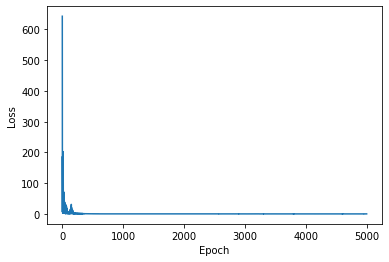

In [29]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [30]:
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
1
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
1
1
0
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
1
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
1
0
1
1
1
0
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1


In [31]:
from sklearn.metrics import confusion_matrix as cm
c = cm(y_test,predictions)
c

array([[5081, 4328],
       [ 150, 9125]], dtype=int64)